# **ML PROJECT**

# **MODULE 1 (DATA PREPROCESSING)**

The weather folder consists of the weather data at 15 different airports in the USA between 2016 and 2017. The flight data of all flights inside the USA is provided. Merge these two data appropriately such that each record of the flight should have the corresponding weather data available.

**Flight data:** https://drive.google.com/folderview?id=1SG-U-9j-kq79JT3_M3j0wiZBjUTQLaqf

**Weather data:** https://drive.google.com/open?id=1FH3SzcDlcDVy4QkwB7z4VNi1bE18d0JA

In [1]:
path = 'Data (CSV)'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [4]:
from joblib import dump, load

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [6]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [7]:
from imblearn.over_sampling import RandomOverSampler

In [8]:
from imblearn.over_sampling import SMOTE

In [9]:
from imblearn.over_sampling import BorderlineSMOTE

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [12]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
Flight_data = pd.read_csv(f'{path}/Flight_data.csv').drop(['Unnamed: 0'],axis=1)

In [15]:
Flight_data['date'] = pd.to_datetime(Flight_data['date'])
Flight_data["Nearest_hundred"] = (Flight_data["CRSDepTime"] // 100) * 100

In [16]:
Flight_data

,date,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes,Origin,Nearest_hundred
0,2016-01-01,1,2016,1,1,741.0,0.0,745,0.0,14747,12478,1610.0,1602,0.0,8.0,SEA,700
1,2016-01-02,1,2016,1,2,737.0,0.0,745,0.0,14747,12478,1613.0,1602,0.0,11.0,SEA,700
2,2016-01-03,1,2016,1,3,743.0,0.0,745,0.0,14747,12478,1547.0,1602,0.0,0.0,SEA,700
3,2016-01-04,1,2016,1,4,737.0,0.0,745,0.0,14747,12478,1551.0,1602,0.0,0.0,SEA,700
4,2016-01-05,1,2016,1,5,708.0,0.0,710,0.0,14747,12478,1524.0,1527,0.0,0.0,SEA,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877280,2017-12-17,4,2017,12,17,1024.0,0.0,1030,0.0,13930,12266,1314.0,1326,0.0,0.0,ORD,1000
1877281,2017-12-17,4,2017,12,17,1148.0,0.0,1156,0.0,12892,11618,1939.0,2017,0.0,0.0,LAX,1100
1877282,2017-12-17,4,2017,12,17,739.0,0.0,737,2.0,12266,11292,904.0,909,0.0,0.0,IAH,700
1877283,2017-12-17,4,2017,12,17,1632.0,0.0,1638,0.0,11298,11292,1727.0,1747,0.0,0.0,DFW,1600


In [17]:
weather_data = pd.read_csv(f'{path}/weather_data.csv').drop(['Unnamed: 0'], axis=1)

In [18]:
weather_data['date'] = pd.to_datetime(weather_data['date'])

In [19]:
weather_data

,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,date,time,airport
0,16,19,122,0.0,10,1026,100,39,31,48,43,72,2016-01-01,0,IAH
1,17,18,122,0.0,10,1026,100,38,33,47,42,72,2016-01-01,100,IAH
2,18,17,122,0.0,10,1026,100,38,34,46,41,72,2016-01-01,200,IAH
3,18,16,122,0.0,10,1026,100,37,36,45,40,73,2016-01-01,300,IAH
4,19,14,122,0.2,10,1027,100,38,35,45,39,76,2016-01-01,400,IAH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263155,6,82,116,0.0,10,1020,21,58,17,68,68,70,2017-12-31,1900,MIA
263156,4,118,116,0.0,10,1021,26,59,16,68,68,74,2017-12-31,2000,MIA
263157,3,153,116,0.0,10,1021,31,60,14,68,68,78,2017-12-31,2100,MIA
263158,2,217,116,0.0,10,1021,37,61,11,67,67,80,2017-12-31,2200,MIA


In [82]:
merged_data = pd.merge(Flight_data, weather_data,left_on=["Nearest_hundred","date","Origin"], right_on=["time","date","airport"], how='left')

In [83]:
merged_data = merged_data.dropna()

In [84]:
merged_data

,date,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes,Origin,Nearest_hundred,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,time,airport
0,2016-01-01,1,2016,1,1,741.0,0.0,745,0.0,14747,12478,1610.0,1602,0.0,8.0,SEA,700,7,107,113,0.0,10,1030,0,23,8,34,29,66,700,SEA
1,2016-01-02,1,2016,1,2,737.0,0.0,745,0.0,14747,12478,1613.0,1602,0.0,11.0,SEA,700,7,119,113,0.0,10,1024,0,24,8,36,32,64,700,SEA
2,2016-01-03,1,2016,1,3,743.0,0.0,745,0.0,14747,12478,1547.0,1602,0.0,0.0,SEA,700,6,85,113,0.0,10,1018,0,20,7,32,28,62,700,SEA
3,2016-01-04,1,2016,1,4,737.0,0.0,745,0.0,14747,12478,1551.0,1602,0.0,0.0,SEA,700,5,9,143,0.2,3,1010,97,32,8,34,31,95,700,SEA
4,2016-01-05,1,2016,1,5,708.0,0.0,710,0.0,14747,12478,1524.0,1527,0.0,0.0,SEA,700,5,62,266,0.1,6,1001,100,35,10,38,35,91,700,SEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877280,2017-12-17,4,2017,12,17,1024.0,0.0,1030,0.0,13930,12266,1314.0,1326,0.0,0.0,ORD,1000,14,105,122,0.0,8,1020,100,31,16,32,26,98,1000,ORD
1877281,2017-12-17,4,2017,12,17,1148.0,0.0,1156,0.0,12892,11618,1939.0,2017,0.0,0.0,LAX,1100,15,26,113,0.0,10,1013,0,24,21,56,53,29,1100,LAX
1877282,2017-12-17,4,2017,12,17,739.0,0.0,737,2.0,12266,11292,904.0,909,0.0,0.0,IAH,700,6,18,122,0.0,9,1019,100,46,8,49,47,91,700,IAH
1877283,2017-12-17,4,2017,12,17,1632.0,0.0,1638,0.0,11298,11292,1727.0,1747,0.0,0.0,DFW,1600,10,175,122,0.0,10,1019,96,43,13,50,47,79,1600,DFW


# **MODULE 2 (CLASSIFICATION)**

Model a classifier that classifies whether a given flight will be delayed or not using the features.

In [85]:
merged_data = merged_data.drop(columns=["time", "airport","date"])

encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(merged_data[["Origin", "DestAirportID"]])
encoded_data = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(["Origin", "DestAirportID"]))

merged_data = pd.concat([merged_data, encoded_data], axis=1)
merged_data = merged_data.drop(columns=["Origin"])

merged_data = merged_data.drop(columns=["DepTime"])

merged_data = merged_data.drop(columns=["DepDelayMinutes","ArrTime", "ArrDel15", "ArrDelayMinutes"])

merged_data = merged_data[~merged_data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [86]:
merged_data

,Quarter,Year,Month,DayofMonth,DepDel15,CRSDepTime,OriginAirportID,DestAirportID,CRSArrTime,Nearest_hundred,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,Origin_ATL,Origin_CLT,Origin_DEN,Origin_DFW,Origin_EWR,Origin_IAH,Origin_JFK,Origin_LAS,Origin_LAX,Origin_MCO,Origin_MIA,Origin_ORD,Origin_PHX,Origin_SEA,Origin_SFO,DestAirportID_10397,DestAirportID_11057,DestAirportID_11292,DestAirportID_11298,DestAirportID_11618,DestAirportID_12266,DestAirportID_12478,DestAirportID_12889,DestAirportID_12892,DestAirportID_13204,DestAirportID_13303,DestAirportID_13930,DestAirportID_14107,DestAirportID_14747,DestAirportID_14771
0,1.0,2016.0,1.0,1.0,0.0,745.0,14747.0,12478.0,1602.0,700.0,7.0,107.0,113.0,0.0,10.0,1030.0,0.0,23.0,8.0,34.0,29.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2016.0,1.0,2.0,0.0,745.0,14747.0,12478.0,1602.0,700.0,7.0,119.0,113.0,0.0,10.0,1024.0,0.0,24.0,8.0,36.0,32.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2016.0,1.0,3.0,0.0,745.0,14747.0,12478.0,1602.0,700.0,6.0,85.0,113.0,0.0,10.0,1018.0,0.0,20.0,7.0,32.0,28.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2016.0,1.0,4.0,0.0,745.0,14747.0,12478.0,1602.0,700.0,5.0,9.0,143.0,0.2,3.0,1010.0,97.0,32.0,8.0,34.0,31.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2016.0,1.0,5.0,0.0,710.0,14747.0,12478.0,1527.0,700.0,5.0,62.0,266.0,0.1,6.0,1001.0,100.0,35.0,10.0,38.0,35.0,91.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851428,4.0,2017.0,12.0,30.0,0.0,59.0,12889.0,11057.0,803.0,0.0,6.0,101.0,113.0,0.0,10.0,1022.0,0.0,16.0,8.0,53.0,53.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1851429,4.0,2017.0,12.0,31.0,0.0,59.0,12889.0,11057.0,803.0,0.0,5.0,118.0,119.0,0.0,10.0,1018.0,75.0,10.0,6.0,49.0,48.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1851430,4.0,2017.0,12.0,10.0,0.0,600.0,12266.0,13303.0,924.0,600.0,1.0,16.0,113.0,0.0,10.0,1029.0,0.0,39.0,6.0,48.0,48.0,70.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1851431,4.0,2017.0,12.0,11.0,0.0,600.0,12266.0,13303.0,924.0,600.0,6.0,254.0,116.0,0.0,10.0,1026.0,2.0,42.0,14.0,49.0,48.0,77.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
X = merged_data.drop(columns=["DepDel15"])
y = merged_data["DepDel15"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

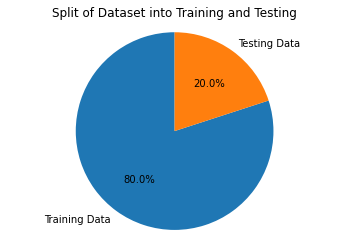

In [27]:
labels = ['Training Data', 'Testing Data']
sizes = [len(X_train), len(X_test)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('Split of Dataset into Training and Testing')
plt.show()

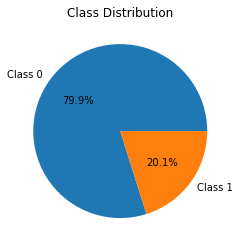

In [28]:
plt.pie(merged_data['DepDel15'].value_counts(), labels=['Class 0', 'Class 1'], autopct='%.1f%%')
plt.title("Class Distribution")
plt.show()

**LOGISTIC REGRESSION**

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
dump(model,'NoSampling models/LogisticRegression.joblib')

In [29]:
model = load('NoSampling models/LogisticRegression.joblib')

In [30]:
y_pred = model.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89    291610
         1.0       0.52      0.00      0.00     73535

    accuracy                           0.80    365145
   macro avg       0.66      0.50      0.44    365145
weighted avg       0.74      0.80      0.71    365145



**XGB CLASSIFIER**

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

In [ ]:
dump(xgb,'NoSampling models/XGBClassifier.joblib')

In [32]:
xgb = load('NoSampling models/XGBClassifier.joblib')

In [33]:
y_pred = xgb.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89    291610
         1.0       0.68      0.09      0.17     73535

    accuracy                           0.81    365145
   macro avg       0.74      0.54      0.53    365145
weighted avg       0.79      0.81      0.75    365145



**RANDOM FOREST**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

In [ ]:
dump(rf,'NoSampling models/RandomForestClassifier.joblib')

In [35]:
rf = load('NoSampling models/RandomForestClassifier.joblib')

In [36]:
y_pred = rf.predict(X_test)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    291610
         1.0       0.97      0.84      0.90     73535

    accuracy                           0.96    365145
   macro avg       0.97      0.92      0.94    365145
weighted avg       0.96      0.96      0.96    365145



**DECISION TREE**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

In [ ]:
dump(dt,'NoSampling models/DecisionTreeClassifier.joblib')

In [38]:
dt = load('NoSampling models/DecisionTreeClassifier.joblib')

In [39]:
y_pred = dt.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97    291610
         1.0       0.86      0.87      0.86     73535

    accuracy                           0.94    365145
   macro avg       0.91      0.92      0.91    365145
weighted avg       0.95      0.94      0.94    365145



**EXTRA TREES**

In [ ]:
et = ExtraTreesClassifier()
et.fit(X_train, y_train)

In [ ]:
dump(et,'NoSampling models/ExtraTreesClassifier.joblib')

In [41]:
et = load('NoSampling models/ExtraTreesClassifier.joblib')

In [42]:
y_pred = et.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    291610
         1.0       0.97      0.83      0.90     73535

    accuracy                           0.96    365145
   macro avg       0.96      0.91      0.94    365145
weighted avg       0.96      0.96      0.96    365145



# **RANDOM UNDER SAMPLING**

In [44]:
sampler = RandomUnderSampler(sampling_strategy='majority')

In [45]:
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

**LOGISTIC REGRESSION**

In [ ]:
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

In [ ]:
dump(model,'Undersampling models/LogisticRegression_Undersampling.joblib')

In [46]:
model = load('Undersampling models/LogisticRegression_Undersampling.joblib')

In [47]:
y_pred = model.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.58      0.69    291610
         1.0       0.27      0.61      0.37     73535

    accuracy                           0.59    365145
   macro avg       0.56      0.60      0.53    365145
weighted avg       0.74      0.59      0.63    365145



**XGB CLASSIFIER**

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_resampled, y_resampled)

In [ ]:
dump(xgb, 'Undersampling models/XGBClassifier_Undersampling.joblib')

In [49]:
xgb = load('Undersampling models/XGBClassifier_Undersampling.joblib')

In [50]:
y_pred = xgb.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.66      0.76    291610
         1.0       0.33      0.67      0.44     73535

    accuracy                           0.66    365145
   macro avg       0.61      0.66      0.60    365145
weighted avg       0.78      0.66      0.69    365145



**RANDOM FOREST**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_resampled, y_resampled)

In [ ]:
dump(rf,'Undersampling models/RandomForestClassifier_Undersampling.joblib')

In [52]:
rf = load('Undersampling models/RandomforestClassifier_Undersampling.joblib')

In [53]:
y_pred = rf.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.73      0.84    291610
         1.0       0.47      0.93      0.62     73535

    accuracy                           0.77    365145
   macro avg       0.72      0.83      0.73    365145
weighted avg       0.87      0.77      0.79    365145



**DECISION TREE**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_resampled, y_resampled)

In [ ]:
dump(dt,'Undersampling models/DecisionTreeClassifier_Undersampling.joblib')

In [55]:
dt = load('Undersampling models/DecisionTreeClassifier_Undersampling.joblib')

In [56]:
y_pred = dt.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.66      0.79    291610
         1.0       0.41      0.92      0.57     73535

    accuracy                           0.72    365145
   macro avg       0.69      0.79      0.68    365145
weighted avg       0.86      0.72      0.74    365145



**EXTRA TREES**

In [ ]:
et = ExtraTreesClassifier(n_jobs=-1,random_state = None)
et.fit(X_resampled, y_resampled)

In [ ]:
dump(et,'Undersampling models/ExtraTreesClassifier_Undersampling.joblib')

In [58]:
et = load('Undersampling models/ExtraTreesClassifier_Undersampling.joblib')

In [59]:
y_pred = et.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83    291610
         1.0       0.46      0.93      0.62     73535

    accuracy                           0.77    365145
   macro avg       0.72      0.83      0.73    365145
weighted avg       0.87      0.77      0.79    365145



# **RANDOM OVER SAMPLING**

In [61]:
ros = RandomOverSampler(sampling_strategy='minority')

In [62]:
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

**LOGISTIC REGRESSION**

In [ ]:
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

In [ ]:
dump(model,'Oversampling models/LogisticRegression_Oversampling.joblib')

In [63]:
model = load('Oversampling models/LogisticRegression_Oversampling.joblib')

In [64]:
y_pred = model.predict(X_test)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.58      0.69    291610
         1.0       0.27      0.61      0.37     73535

    accuracy                           0.59    365145
   macro avg       0.56      0.60      0.53    365145
weighted avg       0.74      0.59      0.63    365145



**XGB CLASSIFIER**

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_resampled, y_resampled)

In [ ]:
dump(xgb,'Oversampling models/XGBoostClassifier_Oversampling.joblib')

In [66]:
xgb = load('Oversampling models/XGBoostClassifier_Oversampling.joblib')

In [67]:
y_pred = xgb.predict(X_test)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.67      0.76    291610
         1.0       0.34      0.66      0.45     73535

    accuracy                           0.67    365145
   macro avg       0.61      0.67      0.60    365145
weighted avg       0.78      0.67      0.70    365145



**RANDOM FOREST CLASSIFIER**

In [ ]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_resampled, y_resampled)

In [ ]:
dump(rf,'Oversampling models/RandomForestClassifier_Oversampling.joblib')

In [69]:
rf = load('Oversampling models/RandomForestClassifier_Oversampling.joblib')

In [70]:
y_pred = rf.predict(X_test)

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97    291610
         1.0       0.93      0.86      0.89     73535

    accuracy                           0.96    365145
   macro avg       0.95      0.92      0.93    365145
weighted avg       0.96      0.96      0.96    365145



**DECISION TREE CLASSIFIER**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_resampled, y_resampled)

In [ ]:
dump(dt,'Oversampling models/DecisionTreeClassifier_Oversampling.joblib')

In [72]:
dt = load('Oversampling models/DecisionTreeClassifier_Oversampling.joblib')

In [73]:
y_pred = dt.predict(X_test)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96    291610
         1.0       0.86      0.87      0.86     73535

    accuracy                           0.94    365145
   macro avg       0.91      0.92      0.91    365145
weighted avg       0.94      0.94      0.94    365145



**EXTRA TREES CLASSIFIER**

In [ ]:
et = ExtraTreesClassifier()
et.fit(X_resampled, y_resampled)

In [ ]:
dump(et,'Oversampling models/ExtraTreesClassifier_Oversampling.joblib')

In [75]:
et = load('Oversampling models/ExtraTreesClassifier_Oversampling.joblib')

In [76]:
y_pred = et.predict(X_test)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    291610
         1.0       0.97      0.83      0.90     73535

    accuracy                           0.96    365145
   macro avg       0.97      0.91      0.94    365145
weighted avg       0.96      0.96      0.96    365145



# **SYNTHETIC MINORITY OVER SAMPLING** (SMOTE)

In [ ]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
dump(smote,'SMOTE/smote.joblib')

In [ ]:
smote = load('SMOTE/smote.joblib')

**LOGISTIC REGRESSION**

In [ ]:
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

In [ ]:
dump(model,'SMOTE/LogisticRegression_SMOTE.joblib')

In [ ]:
model = load('SMOTE/LogisticRegression_SMOTE.joblib')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

**XGB CLASSIFIER**

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_resampled, y_resampled)

In [ ]:
dump(xgb,'SMOTE/XGBClassifier_SMOTE.joblib')

In [ ]:
xgb = load('SMOTE/XGBClassifier_SMOTE.joblib')

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

**RANDOM FOREST CLASSIFIER**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_resampled, y_resampled)

In [ ]:
dump(rf,'SMOTE/RandomForestClassifier_SMOTE.joblib')

In [ ]:
rf = load('SMOTE/RandomForestClassifier_SMOTE.joblib')

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

**DECISION TREE CLASSIFIER**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_resampled, y_resampled)

In [ ]:
dump(dt,'SMOTE/DecisionTreeClassifier_SMOTE.joblib')

In [ ]:
dt = load('SMOTE/DecisionTreeClassifier_SMOTE.joblib')

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

**EXTRA TREES CLASSIFIER**

In [ ]:
et = ExtraTreesClassifier()
et.fit(X_resampled, y_resampled)

In [ ]:
dump(et,'SMOTE/ExtraTreesClassifier_SMOTE.joblib')

In [ ]:
et = load('SMOTE/ExtraTreesClassifier_SMOTE.joblib')

In [ ]:
y_pred = et.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

# **BORDERLINE SMOTE**

In [ ]:
smote_border = BorderlineSMOTE()
X_resampled, y_resampled = smote_border.fit_resample(X_train, y_train)

In [ ]:
dump(smote_border, 'Borderline SMOTE/borderlinesmote.joblib')

In [ ]:
smote_border = load('Borderline SMOTE/borderlinesmote.joblib')

In [ ]:
X_resampled, y_resampled = smote_border.fit(X_train, y_train)

**LOGISTIC REGRESSION**

In [ ]:
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

In [ ]:
dump(model,'Borderline SMOTE/LogisticRegression_BorderlineSMOTE.joblib')

In [ ]:
model = load('Borderline SMOTE/LogisticRegression_BorderlineSMOTE.joblib')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

**XGB CLASSIFIER**

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_resampled, y_resampled)

In [ ]:
dump(xgb,'Borderline SMOTE/XGBClassifier_BorderlineSMOTE.joblib')

In [ ]:
xgb = load('Borderline SMOTE/XGBClassifier_BorderlineSMOTE.joblib')

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

**RANDOM FOREST CLASSIFIER**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_resampled, y_resampled)

In [ ]:
dump(rf,'Borderline SMOTE/RandomForestClassifier_BorderlineSMOTE.joblib')

In [ ]:
rf = load('Borderline SMOTE/RandomForestClassifier_BorderlineSMOTE.joblib')

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

**DECISION TREE CLASSIFIER**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_resampled, y_resampled)

In [ ]:
dump(dt,'Borderline SMOTE/DecisionTreeClassifier_BorderlineSMOTE.joblib')

In [ ]:
dt = load('Borderline SMOTE/DecisionTreeClassifier_BorderlineSMOTE.joblib')

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

**EXTRA TREES CLASSIFIER**

In [ ]:
et = ExtraTreesClassifier()
et.fit(X_resampled, y_resampled)

In [ ]:
dump(et,'Borderline SMOTE/ExtraTreesClassifier_BorderlineSMOTE.joblib')

In [ ]:
et = load('Borderline SMOTE/ExtraTreesClassifier_BorderlineSMOTE.joblib')

In [ ]:
y_pred = et.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

# **PIPELINE**

In [104]:
all_y_pred = et.predict(X)

In [214]:
merged_data = pd.merge(Flight_data, weather_data,left_on=["Nearest_hundred","date","Origin"], right_on=["time","date","airport"], how='left')

In [215]:
merged_data = merged_data.dropna()

In [216]:
merged_data

,date,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes,Origin,Nearest_hundred,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,time,airport
0,2016-01-01,1,2016,1,1,741.0,0.0,745,0.0,14747,12478,1610.0,1602,0.0,8.0,SEA,700,7,107,113,0.0,10,1030,0,23,8,34,29,66,700,SEA
1,2016-01-02,1,2016,1,2,737.0,0.0,745,0.0,14747,12478,1613.0,1602,0.0,11.0,SEA,700,7,119,113,0.0,10,1024,0,24,8,36,32,64,700,SEA
2,2016-01-03,1,2016,1,3,743.0,0.0,745,0.0,14747,12478,1547.0,1602,0.0,0.0,SEA,700,6,85,113,0.0,10,1018,0,20,7,32,28,62,700,SEA
3,2016-01-04,1,2016,1,4,737.0,0.0,745,0.0,14747,12478,1551.0,1602,0.0,0.0,SEA,700,5,9,143,0.2,3,1010,97,32,8,34,31,95,700,SEA
4,2016-01-05,1,2016,1,5,708.0,0.0,710,0.0,14747,12478,1524.0,1527,0.0,0.0,SEA,700,5,62,266,0.1,6,1001,100,35,10,38,35,91,700,SEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877280,2017-12-17,4,2017,12,17,1024.0,0.0,1030,0.0,13930,12266,1314.0,1326,0.0,0.0,ORD,1000,14,105,122,0.0,8,1020,100,31,16,32,26,98,1000,ORD
1877281,2017-12-17,4,2017,12,17,1148.0,0.0,1156,0.0,12892,11618,1939.0,2017,0.0,0.0,LAX,1100,15,26,113,0.0,10,1013,0,24,21,56,53,29,1100,LAX
1877282,2017-12-17,4,2017,12,17,739.0,0.0,737,2.0,12266,11292,904.0,909,0.0,0.0,IAH,700,6,18,122,0.0,9,1019,100,46,8,49,47,91,700,IAH
1877283,2017-12-17,4,2017,12,17,1632.0,0.0,1638,0.0,11298,11292,1727.0,1747,0.0,0.0,DFW,1600,10,175,122,0.0,10,1019,96,43,13,50,47,79,1600,DFW


In [217]:
merged_data = merged_data.drop(columns=["time", "airport","date"])

encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(merged_data[["Origin", "DestAirportID"]])
encoded_data = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(["Origin", "DestAirportID"]))

merged_data = pd.concat([merged_data, encoded_data], axis=1)
merged_data = merged_data.drop(columns=["Origin", "DestAirportID"])
merged_data = merged_data[~merged_data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [218]:
merged_data['predicted_delay'] = all_y_pred

In [219]:
delayed_data = merged_data[merged_data['predicted_delay'] == 1]

In [220]:
delayed_data = delayed_data.drop(columns='predicted_delay')

In [221]:
delayed_data

,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes,Nearest_hundred,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,Origin_ATL,Origin_CLT,Origin_DEN,Origin_DFW,Origin_EWR,Origin_IAH,Origin_JFK,Origin_LAS,Origin_LAX,Origin_MCO,Origin_MIA,Origin_ORD,Origin_PHX,Origin_SEA,Origin_SFO,DestAirportID_10397,DestAirportID_11057,DestAirportID_11292,DestAirportID_11298,DestAirportID_11618,DestAirportID_12266,DestAirportID_12478,DestAirportID_12889,DestAirportID_12892,DestAirportID_13204,DestAirportID_13303,DestAirportID_13930,DestAirportID_14107,DestAirportID_14747,DestAirportID_14771
13,1.0,2016.0,1.0,14.0,737.0,1.0,645.0,52.0,14747.0,1537.0,1506.0,1.0,31.0,600.0,11.0,176.0,116.0,0.1,10.0,1017.0,66.0,37.0,21.0,40.0,35.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,1.0,2016.0,1.0,17.0,728.0,1.0,645.0,43.0,14747.0,1532.0,1506.0,1.0,26.0,600.0,14.0,128.0,266.0,0.4,5.0,1009.0,100.0,38.0,28.0,44.0,39.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,1.0,2016.0,1.0,22.0,1229.0,1.0,645.0,344.0,14747.0,2041.0,1506.0,1.0,335.0,600.0,15.0,172.0,353.0,1.5,9.0,1004.0,100.0,41.0,32.0,46.0,40.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,1.0,2016.0,1.0,2.0,1929.0,1.0,1825.0,64.0,12478.0,2246.0,2150.0,1.0,56.0,1800.0,19.0,244.0,113.0,0.0,10.0,1015.0,0.0,29.0,25.0,38.0,29.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33,1.0,2016.0,1.0,3.0,1856.0,1.0,1825.0,31.0,12478.0,2246.0,2150.0,1.0,56.0,1800.0,20.0,277.0,122.0,0.0,10.0,1010.0,67.0,33.0,23.0,38.0,33.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851384,4.0,2017.0,12.0,17.0,1817.0,1.0,1800.0,17.0,12266.0,2011.0,1958.0,0.0,13.0,1800.0,5.0,116.0,122.0,0.0,10.0,1019.0,100.0,54.0,6.0,60.0,60.0,81.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1851392,4.0,2017.0,12.0,26.0,2217.0,1.0,1800.0,257.0,12266.0,13.0,1958.0,1.0,255.0,1800.0,13.0,54.0,122.0,0.0,7.0,1022.0,100.0,44.0,20.0,46.0,42.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1851400,4.0,2017.0,12.0,17.0,1357.0,1.0,1335.0,22.0,14107.0,1738.0,1706.0,1.0,32.0,1300.0,13.0,81.0,116.0,0.0,10.0,1013.0,25.0,41.0,15.0,59.0,56.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1851408,4.0,2017.0,12.0,26.0,1821.0,1.0,1335.0,286.0,14107.0,2144.0,1706.0,1.0,278.0,1300.0,4.0,113.0,116.0,0.0,10.0,1020.0,26.0,15.0,5.0,58.0,59.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**SPLIT INTO TRAIN,TEST SET**

In [222]:
X = delayed_data.drop("ArrDelayMinutes", axis=1)
y = delayed_data["ArrDelayMinutes"]

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

**LINEAR REGRESSION**

In [224]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [225]:
dump(reg,'Pipeline/LinearRegression_pipeline.joblib')

['Pipeline/LinearRegression_pipeline.joblib']

In [226]:
reg = load('Pipeline/LinearRegression_pipeline.joblib')

In [227]:
y_pred = reg.predict(X_test)

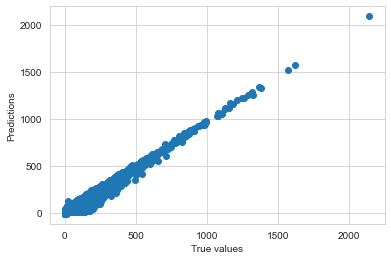

In [228]:
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()

In [229]:
print("Mean Squared Error: ", round(mean_squared_error(y_test, y_pred),2))
print("Mean Absolute Error: ", round(mean_absolute_error(y_test, y_pred),2))
print("R-squared: ", round(r2_score(y_test,y_pred),4))

Mean Squared Error:  272.59
Mean Absolute Error:  11.21
R-squared:  0.9535


**RANDOM FOREST REGRESSOR**

In [230]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
dump(rf,'Pipeline/RandomForestRegressor_pipeline.joblib')

In [ ]:
rf = load('Pipeline/RandomForestRegressor_pipeline.joblib')

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()

In [ ]:
print("Mean Squared Error: ", round(mean_squared_error(y_test, y_pred),2))
print("Mean Absolute Error: ", round(mean_absolute_error(y_test, y_pred),2))
print("R-squared: ", round(r2_score(y_test,y_pred),4))

**EXTRA TREES REGRESSOR**

In [231]:
etr = ExtraTreesRegressor(random_state=42)
etr.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

In [232]:
dump(etr,'Pipeline/ExtraTreesRegressor_pipeline.joblib')

['Pipeline/ExtraTreesRegressor_pipeline.joblib']

In [233]:
etr = load('Pipeline/ExtraTreesRegressor_pipeline.joblib')

In [234]:
y_pred = etr.predict(X_test)

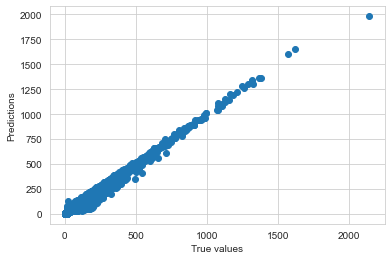

In [235]:
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()

In [236]:
print("Mean Squared Error: ", round(mean_squared_error(y_test, y_pred),2))
print("Mean Absolute Error: ", round(mean_absolute_error(y_test, y_pred),2))
print("R-squared: ", round(r2_score(y_test,y_pred),4))

Mean Squared Error:  167.76
Mean Absolute Error:  8.61
R-squared:  0.9714


**XGB REGRESSOR**

In [237]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [238]:
dump(xgb,'Pipeline/XGBRegressor_pipeline.joblib')

['Pipeline/XGBRegressor_pipeline.joblib']

In [239]:
xgb = load('Pipeline/XGBRegressor_pipeline.joblib')

In [240]:
y_pred = xgb.predict(X_test)

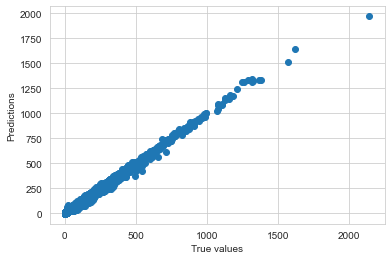

In [241]:
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()

In [242]:
print("Mean Squared Error: ", round(mean_squared_error(y_test, y_pred),2))
print("Mean Absolute Error: ", round(mean_absolute_error(y_test, y_pred),2))
print("R-squared: ", round(r2_score(y_test,y_pred),4))

Mean Squared Error:  43.69
Mean Absolute Error:  4.5
R-squared:  0.9925


# **Module 3 (REGRESSION)**

Train a regression engine which predicts the Arrival delay period (in minutes) for delayed flights.

In [147]:
merged_data = pd.merge(Flight_data, weather_data,left_on=["Nearest_hundred","date","Origin"], right_on=["time","date","airport"], how='left')

In [148]:
merged_data = merged_data.dropna()

In [149]:
merged_data = merged_data[merged_data["ArrDel15"]==1]
merged_data = merged_data.drop(columns=["time", "airport","date","ArrDel15"])

encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(merged_data[["Origin", "DestAirportID"]])
encoded_data = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(["Origin", "DestAirportID"]))

merged_data = pd.concat([merged_data, encoded_data], axis=1)
merged_data = merged_data.drop(columns=["Origin", "DestAirportID"])
merged_data = merged_data[~merged_data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [150]:
merged_data

,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,ArrTime,CRSArrTime,ArrDelayMinutes,Nearest_hundred,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,Origin_ATL,Origin_CLT,Origin_DEN,Origin_DFW,Origin_EWR,Origin_IAH,Origin_JFK,Origin_LAS,Origin_LAX,Origin_MCO,Origin_MIA,Origin_ORD,Origin_PHX,Origin_SEA,Origin_SFO,DestAirportID_10397,DestAirportID_11057,DestAirportID_11292,DestAirportID_11298,DestAirportID_11618,DestAirportID_12266,DestAirportID_12478,DestAirportID_12889,DestAirportID_12892,DestAirportID_13204,DestAirportID_13303,DestAirportID_13930,DestAirportID_14107,DestAirportID_14747,DestAirportID_14771
9,1.0,2016.0,1.0,10.0,711.0,0.0,710.0,1.0,14747.0,1611.0,1527.0,44.0,700.0,5.0,112.0,122.0,0.0,10.0,1024.0,87.0,35.0,9.0,37.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13,1.0,2016.0,1.0,14.0,737.0,1.0,645.0,52.0,14747.0,1537.0,1506.0,31.0,600.0,11.0,176.0,116.0,0.1,10.0,1017.0,66.0,37.0,21.0,40.0,35.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,1.0,2016.0,1.0,17.0,728.0,1.0,645.0,43.0,14747.0,1532.0,1506.0,26.0,600.0,14.0,128.0,266.0,0.4,5.0,1009.0,100.0,38.0,28.0,44.0,39.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,1.0,2016.0,1.0,22.0,1229.0,1.0,645.0,344.0,14747.0,2041.0,1506.0,335.0,600.0,15.0,172.0,353.0,1.5,9.0,1004.0,100.0,41.0,32.0,46.0,40.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32,1.0,2016.0,1.0,2.0,1929.0,1.0,1825.0,64.0,12478.0,2246.0,2150.0,56.0,1800.0,19.0,244.0,113.0,0.0,10.0,1015.0,0.0,29.0,25.0,38.0,29.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388051,2.0,2016.0,6.0,9.0,1440.0,1.0,1420.0,20.0,11298.0,1757.0,1731.0,26.0,1400.0,17.0,176.0,113.0,0.0,10.0,1014.0,0.0,68.0,19.0,91.0,90.0,50.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388052,2.0,2016.0,6.0,10.0,1703.0,1.0,1420.0,163.0,11298.0,2012.0,1731.0,161.0,1400.0,19.0,164.0,113.0,0.0,10.0,1015.0,4.0,67.0,22.0,92.0,90.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
388053,2.0,2016.0,6.0,11.0,1501.0,1.0,1420.0,41.0,11298.0,1834.0,1731.0,63.0,1400.0,15.0,183.0,200.0,0.0,9.0,1017.0,83.0,71.0,17.0,88.0,85.0,64.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
388055,2.0,2016.0,6.0,13.0,1522.0,1.0,1420.0,62.0,11298.0,1937.0,1731.0,126.0,1400.0,14.0,189.0,122.0,0.0,10.0,1013.0,99.0,74.0,17.0,87.0,87.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**SPLIT INTO TRAIN, TEST SET**

In [151]:
X = merged_data.drop("ArrDelayMinutes", axis=1)
y = merged_data["ArrDelayMinutes"]

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

**LINEAR REGRESSION**

In [153]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [158]:
dump(reg,'Regressors/LinearRegression.joblib')

['Regressors/LinearRegression.joblib']

In [159]:
reg = load('Regressors/LinearRegression.joblib')

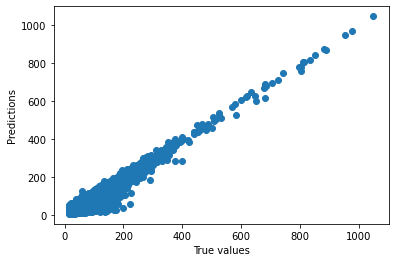

In [160]:
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()

In [161]:
print("Mean Squared Error: ", round(mean_squared_error(y_test, y_pred),2))
print("Mean Absolute Error: ", round(mean_absolute_error(y_test, y_pred),2))
print("R-squared: ", round(r2_score(y_test,y_pred),4))

Mean Squared Error:  274.24
Mean Absolute Error:  11.47
R-squared:  0.9407


**RANDOM FOREST REGRESSOR**

In [162]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [163]:
dump(rf,'Regressors/RandomForestRegressor.joblib')

['Regressors/RandomForestRegressor.joblib']

In [164]:
y_pred = rf.predict(X_test)

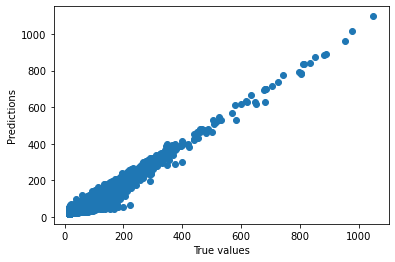

In [165]:
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()

In [166]:
print("Mean Squared Error: ", round(mean_squared_error(y_test, y_pred),2))
print("Mean Absolute Error: ", round(mean_absolute_error(y_test, y_pred),2))
print("R-squared: ", round(r2_score(y_test,y_pred),4))

Mean Squared Error:  181.66
Mean Absolute Error:  8.61
R-squared:  0.9607


**EXTRA TREES REGRESSOR**

In [167]:
etr = ExtraTreesRegressor(random_state=42)
etr.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

In [168]:
dump(etr,'Regressors/ExtraTreesRegressor.joblib')

['ExtraTreesRegressor.joblib']

In [169]:
etr = load('Regressors/ExtraTreesRegressor.joblib')

In [170]:
y_pred = etr.predict(X_test)

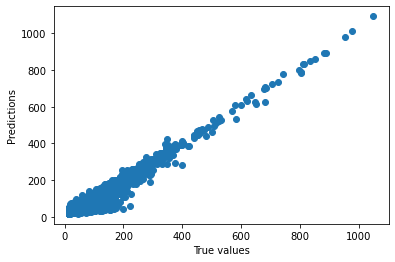

In [171]:
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()

In [172]:
print("Mean Squared Error: ", round(mean_squared_error(y_test, y_pred),2))
print("Mean Absolute Error: ", round(mean_absolute_error(y_test, y_pred),2))
print("R-squared: ", round(r2_score(y_test,y_pred),4))

Mean Squared Error:  224.04
Mean Absolute Error:  10.15
R-squared:  0.9516


**XGB REGRESSOR**

In [173]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [174]:
dump(xgb,'Regressors/XGBRegressor.joblib')

['Regressors/XGBRegressor.joblib']

In [175]:
xgb = load('Regressors/XGBRegressor.joblib')

In [176]:
y_pred = xgb.predict(X_test)

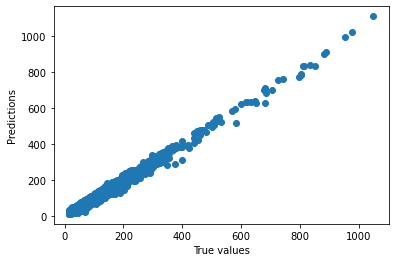

In [177]:
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()

In [178]:
print("Mean Squared Error: ", round(mean_squared_error(y_test, y_pred),2))
print("Mean Absolute Error: ", round(mean_absolute_error(y_test, y_pred),2))
print("R-squared: ", round(r2_score(y_test,y_pred),4))

Mean Squared Error:  48.95
Mean Absolute Error:  4.6
R-squared:  0.9894


# **REGRESSION ANALYSIS**

In [243]:
xgb = load('Pipeline/XGBRegressor_pipeline.joblib')

In [244]:
merged_data = pd.merge(Flight_data, weather_data,left_on=["Nearest_hundred","date","Origin"], right_on=["time","date","airport"], how='left')

In [245]:
merged_data = merged_data.dropna()

In [246]:
merged_data = merged_data.drop(columns=["time", "airport","date"])

encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(merged_data[["Origin", "DestAirportID"]])
encoded_data = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(["Origin", "DestAirportID"]))

merged_data = pd.concat([merged_data, encoded_data], axis=1)
merged_data = merged_data.drop(columns=["Origin", "DestAirportID"])
merged_data = merged_data[~merged_data.isin([np.nan, np.inf, -np.inf]).any(1)]

merged_data['predicted_delay'] = all_y_pred

In [247]:
delayed_data = merged_data[merged_data['predicted_delay'] == 1]

In [248]:
delayed_data

,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes,Nearest_hundred,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,Origin_ATL,Origin_CLT,Origin_DEN,Origin_DFW,Origin_EWR,Origin_IAH,Origin_JFK,Origin_LAS,Origin_LAX,Origin_MCO,Origin_MIA,Origin_ORD,Origin_PHX,Origin_SEA,Origin_SFO,DestAirportID_10397,DestAirportID_11057,DestAirportID_11292,DestAirportID_11298,DestAirportID_11618,DestAirportID_12266,DestAirportID_12478,DestAirportID_12889,DestAirportID_12892,DestAirportID_13204,DestAirportID_13303,DestAirportID_13930,DestAirportID_14107,DestAirportID_14747,DestAirportID_14771,predicted_delay
13,1.0,2016.0,1.0,14.0,737.0,1.0,645.0,52.0,14747.0,1537.0,1506.0,1.0,31.0,600.0,11.0,176.0,116.0,0.1,10.0,1017.0,66.0,37.0,21.0,40.0,35.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16,1.0,2016.0,1.0,17.0,728.0,1.0,645.0,43.0,14747.0,1532.0,1506.0,1.0,26.0,600.0,14.0,128.0,266.0,0.4,5.0,1009.0,100.0,38.0,28.0,44.0,39.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21,1.0,2016.0,1.0,22.0,1229.0,1.0,645.0,344.0,14747.0,2041.0,1506.0,1.0,335.0,600.0,15.0,172.0,353.0,1.5,9.0,1004.0,100.0,41.0,32.0,46.0,40.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32,1.0,2016.0,1.0,2.0,1929.0,1.0,1825.0,64.0,12478.0,2246.0,2150.0,1.0,56.0,1800.0,19.0,244.0,113.0,0.0,10.0,1015.0,0.0,29.0,25.0,38.0,29.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
33,1.0,2016.0,1.0,3.0,1856.0,1.0,1825.0,31.0,12478.0,2246.0,2150.0,1.0,56.0,1800.0,20.0,277.0,122.0,0.0,10.0,1010.0,67.0,33.0,23.0,38.0,33.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851384,4.0,2017.0,12.0,17.0,1817.0,1.0,1800.0,17.0,12266.0,2011.0,1958.0,0.0,13.0,1800.0,5.0,116.0,122.0,0.0,10.0,1019.0,100.0,54.0,6.0,60.0,60.0,81.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1851392,4.0,2017.0,12.0,26.0,2217.0,1.0,1800.0,257.0,12266.0,13.0,1958.0,1.0,255.0,1800.0,13.0,54.0,122.0,0.0,7.0,1022.0,100.0,44.0,20.0,46.0,42.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1851400,4.0,2017.0,12.0,17.0,1357.0,1.0,1335.0,22.0,14107.0,1738.0,1706.0,1.0,32.0,1300.0,13.0,81.0,116.0,0.0,10.0,1013.0,25.0,41.0,15.0,59.0,56.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1851408,4.0,2017.0,12.0,26.0,1821.0,1.0,1335.0,286.0,14107.0,2144.0,1706.0,1.0,278.0,1300.0,4.0,113.0,116.0,0.0,10.0,1020.0,26.0,15.0,5.0,58.0,59.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [250]:
reg_pred = xgb.predict(delayed_data.drop(columns=['ArrDelayMinutes','predicted_delay']))

In [251]:
delayed_data['reg_pred'] = reg_pred

In [253]:
delayed_data['duration_interval'] = pd.cut(delayed_data['reg_pred'], bins=[15, 100, 200, 500, 1000, 2000,np.inf])

In [271]:
delayed_data

,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes,Nearest_hundred,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,Origin_ATL,Origin_CLT,Origin_DEN,Origin_DFW,Origin_EWR,Origin_IAH,Origin_JFK,Origin_LAS,Origin_LAX,Origin_MCO,Origin_MIA,Origin_ORD,Origin_PHX,Origin_SEA,Origin_SFO,DestAirportID_10397,DestAirportID_11057,DestAirportID_11292,DestAirportID_11298,DestAirportID_11618,DestAirportID_12266,DestAirportID_12478,DestAirportID_12889,DestAirportID_12892,DestAirportID_13204,DestAirportID_13303,DestAirportID_13930,DestAirportID_14107,DestAirportID_14747,DestAirportID_14771,predicted_delay,reg_pred,duration_interval
13,1.0,2016.0,1.0,14.0,737.0,1.0,645.0,52.0,14747.0,1537.0,1506.0,1.0,31.0,600.0,11.0,176.0,116.0,0.1,10.0,1017.0,66.0,37.0,21.0,40.0,35.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35.892799,"(15.0, 100.0]"
16,1.0,2016.0,1.0,17.0,728.0,1.0,645.0,43.0,14747.0,1532.0,1506.0,1.0,26.0,600.0,14.0,128.0,266.0,0.4,5.0,1009.0,100.0,38.0,28.0,44.0,39.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32.344555,"(15.0, 100.0]"
21,1.0,2016.0,1.0,22.0,1229.0,1.0,645.0,344.0,14747.0,2041.0,1506.0,1.0,335.0,600.0,15.0,172.0,353.0,1.5,9.0,1004.0,100.0,41.0,32.0,46.0,40.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,329.829803,"(200.0, 500.0]"
32,1.0,2016.0,1.0,2.0,1929.0,1.0,1825.0,64.0,12478.0,2246.0,2150.0,1.0,56.0,1800.0,19.0,244.0,113.0,0.0,10.0,1015.0,0.0,29.0,25.0,38.0,29.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,49.837326,"(15.0, 100.0]"
33,1.0,2016.0,1.0,3.0,1856.0,1.0,1825.0,31.0,12478.0,2246.0,2150.0,1.0,56.0,1800.0,20.0,277.0,122.0,0.0,10.0,1010.0,67.0,33.0,23.0,38.0,33.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,55.702076,"(15.0, 100.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851384,4.0,2017.0,12.0,17.0,1817.0,1.0,1800.0,17.0,12266.0,2011.0,1958.0,0.0,13.0,1800.0,5.0,116.0,122.0,0.0,10.0,1019.0,100.0,54.0,6.0,60.0,60.0,81.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.708811,NaN
1851392,4.0,2017.0,12.0,26.0,2217.0,1.0,1800.0,257.0,12266.0,13.0,1958.0,1.0,255.0,1800.0,13.0,54.0,122.0,0.0,7.0,1022.0,100.0,44.0,20.0,46.0,42.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,249.971191,"(200.0, 500.0]"
1851400,4.0,2017.0,12.0,17.0,1357.0,1.0,1335.0,22.0,14107.0,1738.0,1706.0,1.0,32.0,1300.0,13.0,81.0,116.0,0.0,10.0,1013.0,25.0,41.0,15.0,59.0,56.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.335583,"(15.0, 100.0]"
1851408,4.0,2017.0,12.0,26.0,1821.0,1.0,1335.0,286.0,14107.0,2144.0,1706.0,1.0,278.0,1300.0,4.0,113.0,116.0,0.0,10.0,1020.0,26.0,15.0,5.0,58.0,59.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,280.245911,"(200.0, 500.0]"


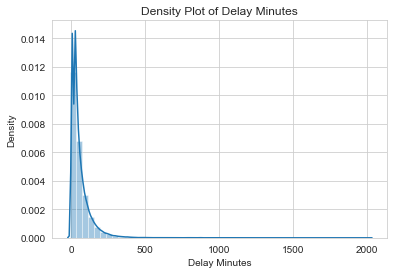

In [259]:
sns.set_style('whitegrid')
sns.distplot(delayed_data['reg_pred'], hist=True, kde=True)
plt.title('Density Plot of Delay Minutes')
plt.xlabel('Delay Minutes')
plt.ylabel('Density')
plt.show()

In [255]:
delayed_data

,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,DepDelayMinutes,OriginAirportID,ArrTime,CRSArrTime,ArrDel15,ArrDelayMinutes,Nearest_hundred,windspeedKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,Origin_ATL,Origin_CLT,Origin_DEN,Origin_DFW,Origin_EWR,Origin_IAH,Origin_JFK,Origin_LAS,Origin_LAX,Origin_MCO,Origin_MIA,Origin_ORD,Origin_PHX,Origin_SEA,Origin_SFO,DestAirportID_10397,DestAirportID_11057,DestAirportID_11292,DestAirportID_11298,DestAirportID_11618,DestAirportID_12266,DestAirportID_12478,DestAirportID_12889,DestAirportID_12892,DestAirportID_13204,DestAirportID_13303,DestAirportID_13930,DestAirportID_14107,DestAirportID_14747,DestAirportID_14771,predicted_delay,reg_pred,duration_interval
13,1.0,2016.0,1.0,14.0,737.0,1.0,645.0,52.0,14747.0,1537.0,1506.0,1.0,31.0,600.0,11.0,176.0,116.0,0.1,10.0,1017.0,66.0,37.0,21.0,40.0,35.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35.892799,"(15.0, 100.0]"
16,1.0,2016.0,1.0,17.0,728.0,1.0,645.0,43.0,14747.0,1532.0,1506.0,1.0,26.0,600.0,14.0,128.0,266.0,0.4,5.0,1009.0,100.0,38.0,28.0,44.0,39.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32.344555,"(15.0, 100.0]"
21,1.0,2016.0,1.0,22.0,1229.0,1.0,645.0,344.0,14747.0,2041.0,1506.0,1.0,335.0,600.0,15.0,172.0,353.0,1.5,9.0,1004.0,100.0,41.0,32.0,46.0,40.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,329.829803,"(200.0, 500.0]"
32,1.0,2016.0,1.0,2.0,1929.0,1.0,1825.0,64.0,12478.0,2246.0,2150.0,1.0,56.0,1800.0,19.0,244.0,113.0,0.0,10.0,1015.0,0.0,29.0,25.0,38.0,29.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,49.837326,"(15.0, 100.0]"
33,1.0,2016.0,1.0,3.0,1856.0,1.0,1825.0,31.0,12478.0,2246.0,2150.0,1.0,56.0,1800.0,20.0,277.0,122.0,0.0,10.0,1010.0,67.0,33.0,23.0,38.0,33.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,55.702076,"(15.0, 100.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851384,4.0,2017.0,12.0,17.0,1817.0,1.0,1800.0,17.0,12266.0,2011.0,1958.0,0.0,13.0,1800.0,5.0,116.0,122.0,0.0,10.0,1019.0,100.0,54.0,6.0,60.0,60.0,81.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.708811,NaN
1851392,4.0,2017.0,12.0,26.0,2217.0,1.0,1800.0,257.0,12266.0,13.0,1958.0,1.0,255.0,1800.0,13.0,54.0,122.0,0.0,7.0,1022.0,100.0,44.0,20.0,46.0,42.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,249.971191,"(200.0, 500.0]"
1851400,4.0,2017.0,12.0,17.0,1357.0,1.0,1335.0,22.0,14107.0,1738.0,1706.0,1.0,32.0,1300.0,13.0,81.0,116.0,0.0,10.0,1013.0,25.0,41.0,15.0,59.0,56.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.335583,"(15.0, 100.0]"
1851408,4.0,2017.0,12.0,26.0,1821.0,1.0,1335.0,286.0,14107.0,2144.0,1706.0,1.0,278.0,1300.0,4.0,113.0,116.0,0.0,10.0,1020.0,26.0,15.0,5.0,58.0,59.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,280.245911,"(200.0, 500.0]"


In [256]:
for name, group in delayed_data.groupby('duration_interval'):
    
    X = group.drop(['ArrDelayMinutes','reg_pred', 'predicted_delay'], axis=1)
    X['duration_interval'] = pd.Categorical(X['duration_interval']).codes

    y = group['reg_pred']
    
    regressor = XGBRegressor()
    regressor.fit(X, y)
    
    y_pred = regressor.predict(X)

    mae = round(mean_absolute_error(y, y_pred),3)
    mse = round(mean_squared_error(y, y_pred),3)
    r2 = r2_score(y, y_pred)
    
    print(f"Interval {name}: MAE = {mae}, MSE = {mse}, R2 = {r2}")

Interval (15.0, 100.0]: MAE = 1.8220000267028809, MSE = 6.198999881744385, R2 = 0.9870726842091954
Interval (100.0, 200.0]: MAE = 2.4779999256134033, MSE = 10.972000122070312, R2 = 0.9851357480475029
Interval (200.0, 500.0]: MAE = 2.118000030517578, MSE = 7.925000190734863, R2 = 0.9981783984962792
Interval (500.0, 1000.0]: MAE = 0.2750000059604645, MSE = 0.15299999713897705, R2 = 0.9999921750453794
Interval (1000.0, 2000.0]: MAE = 0.0010000000474974513, MSE = 0.0, R2 = 0.999999999978041
Interval (2000.0, inf]: MAE = 0.0, MSE = 0.0, R2 = nan


In [260]:
counts = delayed_data['duration_interval'].value_counts()
print(counts)

(15.0, 100.0]       189670
(100.0, 200.0]       39963
(200.0, 500.0]       11910
(500.0, 1000.0]        917
(1000.0, 2000.0]       151
(2000.0, inf]            1
Name: duration_interval, dtype: int64
